## Lending Club Case Study

- 1. Basic data import into python 
- 2. Configuration changes  -  MAX Columns display
- 3. Basic data exploration -  With descibe() with Pandas


In [4]:
# Libraries Imports
import pandas as pd

In [5]:
# Data Imports
loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")

# Set to display all the columns by changing the Pandas display option
pd.set_option("display.max_columns", 111)

# the number of missing items of all columns
pd.set_option("display.max_rows", None)

C:\Users\lvinjamuri\AppData\Local\Temp\ipykernel_53536\459410176.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")


In [6]:
loan_data.shape

(39717, 111)

### Collating all the important columns

### Show count of sum of null items for all columns 

In [7]:
# Empty items in each column
nan_count = (loan_data.isnull().sum())

sorted_nan_count = nan_count.sort_values(ascending=True).rename_axis('count of sum of null items for all rows ')
print(sorted_nan_count)

count of sum of null items for all rows 
id                                    0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
delinq_2yrs                           0
total_pymnt                           0
total_rec_int                         0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
acc_now_delinq                        0
delinq_amnt                           0
total_pymnt_inv                       0
dti                                   0
total_rec_prncp                       0

### Dropping all the columns with more than 20000 null values

Explaination -  Around 50% of these columns have nulll values makes it utable for data analysis

In [8]:

#drop all the columns (axis=1)
columns_to_drop = ['mths_since_last_delinq',
                   'mths_since_last_record', 
                   'next_pymnt_d', 
                   'num_bc_sats',
                   'mths_since_recent_bc',
                   'mths_since_recent_bc_dlq',
                   'mths_since_recent_inq',
                   'mths_since_recent_revol_delinq',
                   'num_accts_ever_120_pd',
                   'num_actv_bc_tl',
                   'num_actv_rev_tl',
                   'mort_acc',
                   'num_bc_tl',
                   'num_tl_op_past_12m',
                   'num_op_rev_tl',
                   'num_rev_accts',
                   'num_rev_tl_bal_gt_0',
                   'num_sats',
                   'num_tl_120dpd_2m',
                   'num_tl_30dpd',
                   'num_tl_90g_dpd_24m',
                   'pct_tl_nvr_dlq',
                   'percent_bc_gt_75',
                   'tot_hi_cred_lim',
                   'total_bal_ex_mort',
                   'mo_sin_rcnt_tl',
                   'num_il_tl',
                   'mo_sin_rcnt_rev_tl_op',
                   'verification_status_joint',
                   'mo_sin_old_il_acct',
                   'mths_since_last_major_derog',
                   'annual_inc_joint',
                   'dti_joint',
                   'total_bc_limit',
                   'tot_coll_amt',
                   'tot_cur_bal',
                   'open_acc_6m',
                   'open_il_6m',
                   'open_il_12m',
                   'open_il_24m',
                   'mths_since_rcnt_il',
                   'total_bal_il',
                   'il_util',
                   'open_rv_12m',
                   'open_rv_24m',
                   'max_bal_bc',
                   'all_util',
                   'total_rev_hi_lim',
                   'inq_fi',
                   'total_cu_tl',
                   'inq_last_12m',
                   'acc_open_past_24mths',
                   'avg_cur_bal',
                   'bc_open_to_buy',
                   'bc_util',
                   'mo_sin_old_rev_tl_op',
                   'total_il_high_credit_limit',
                   'id',
                   'url',
                   'member_id',
                   'zip_code',
                   'emp_title',
                   'desc',
                   'purpose',
                   'initial_list_status',
                   'policy_code',
                   'delinq_amnt',
                   'tax_liens',
                   'chargeoff_within_12_mths',
                   'acc_now_delinq',
                   'collections_12_mths_ex_med',
                   'title',
                   'out_prncp',
                   'collection_recovery_fee',
                   'sub_grade',
                   'grade',
                   'pymnt_plan',
                   'earliest_cr_line',
                   'application_type',
                   'last_credit_pull_d',
                   'addr_state',
                   'funded_amnt',
                   'funded_amnt_inv',
                   'delinq_2yrs',
                   'inq_last_6mths',
                   'open_acc',
                   'revol_bal',
                   'out_prncp_inv',
                   'total_rec_late_fee',	
                   'recoveries',
                   'last_pymnt_d',
                   'last_pymnt_amnt',
                   'total_pymnt_inv'                
                   ]
final_loan_data  = loan_data.drop(columns_to_drop,axis=1)


### Delete the records where the loan is still ongoing
- loan_status = Current

Explaination -  The outcome of the loans that are stll ongoing can not be determined.

In [9]:
current_loan_status = final_loan_data["loan_status"] !="Current"
final_loan_data = final_loan_data[current_loan_status]
final_loan_data.shape

(38577, 18)

In [10]:
# Number of empty cells in all columns in the working dataframe
final_loan_data.isnull().sum().sort_values(ascending=False).rename_axis('Number of empty cells in all columns in the working dataframe')

Number of empty cells in all columns in the working dataframe
emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
dti                        0
total_rec_int              0
total_rec_prncp            0
total_pymnt                0
total_acc                  0
pub_rec                    0
loan_amnt                  0
term                       0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
installment                0
int_rate                   0
loan_status                0
dtype: int64

### Columns data formatting
- 'emp_length' remove -  >,< years
- 'issue_d' conversion into date format
- term' column remove 'months and convert into years
- int_rate column remove '%' and convert into float


In [11]:
# 'emp_length' remove -  >,< years
final_loan_data['emp_length'] = final_loan_data['emp_length'].replace('(\\d+)\\s*years', r'\1', regex=True)
#final_loan_data['emp_length'] = final_loan_data['emp_length'].replace('1 year', 1).astype(int) # 


In [12]:
# 'issue_d' conversion into date format
final_loan_data['issue_d']  = pd.to_datetime(final_loan_data['issue_d'], format='%b-%y')

In [13]:
# 'term' column remove 'months 
# Convert into years
final_loan_data['term'] = final_loan_data['term'].replace('(\\d+)\\s*months',r'\1', regex=True ).astype(int)
final_loan_data['term'] = final_loan_data['term']/12

In [14]:
# int_rate column remove '%' and convert into float
final_loan_data['int_rate'] = final_loan_data['int_rate'].replace('(\\d)\\s*%',r'\1', regex=True).astype(float)

### Summary table - Ordered Categorical Variables frequency of repetions


#### Lower duration loans 3 years are more likely to default 

sugestion  -  Prefer candidate applications with longer durations

In [15]:
final_loan_data[['term','loan_status',]].value_counts()

term  loan_status
3.0   Fully Paid     25869
5.0   Fully Paid      7081
3.0   Charged Off     3227
5.0   Charged Off     2400
Name: count, dtype: int64

<bound method Artist.have_units of <Axes: xlabel='term'>>

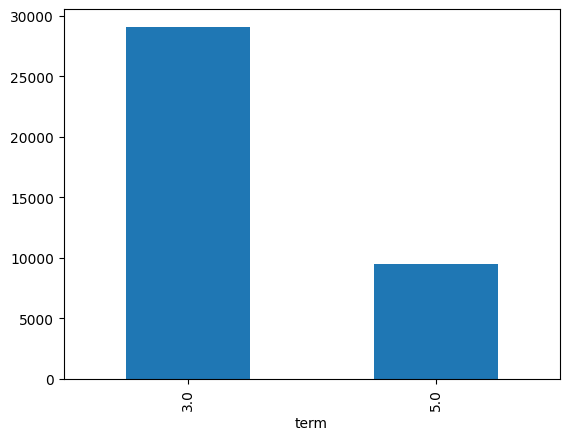

In [27]:
final_loan_data['term'].value_counts().plot.bar()

In [17]:
final_loan_data[['loan_status',]].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [18]:
'''
import matplotlib.pyplot as plt

# create a line chart of 'loan_amount' vs 'term_years' with 'loan_status' as the color
plt.plot(final_loan_data['loan_amnt'], final_loan_data['term'], c=pd.factorize(final_loan_data['loan_status'])[0])
plt.xlabel('Loan Amount')
plt.ylabel('Term (Years)')
plt.title('Loan Amount vs Term by Loan Status')
plt.show()

'''

"\nimport matplotlib.pyplot as plt\n\n# create a line chart of 'loan_amount' vs 'term_years' with 'loan_status' as the color\nplt.plot(final_loan_data['loan_amnt'], final_loan_data['term'], c=pd.factorize(final_loan_data['loan_status'])[0])\nplt.xlabel('Loan Amount')\nplt.ylabel('Term (Years)')\nplt.title('Loan Amount vs Term by Loan Status')\nplt.show()\n\n"

In [19]:
# Working dataframe
final_loan_data.head(5)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,pub_rec,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,pub_rec_bankruptcies
0,5000,3.0,10.65,162.87,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,27.65,0,83.70%,9,5863.155187,5000.00,863.16,0.0
1,2500,5.0,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,1.00,0,9.40%,4,1008.710000,456.46,435.17,0.0
2,2400,3.0,15.96,84.33,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,8.72,0,98.50%,10,3005.666844,2400.00,605.67,0.0
3,10000,3.0,13.49,339.31,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,20.00,0,21%,37,12231.890000,10000.00,2214.92,0.0
5,5000,3.0,7.90,156.46,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,11.20,0,28.30%,12,5632.210000,5000.00,632.21,0.0


In [20]:
final_loan_data.columns

final_loan_data.shape

(38577, 18)

In [21]:
final_loan_data.dtypes

loan_amnt                        int64
term                           float64
int_rate                       float64
installment                    float64
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
dti                            float64
pub_rec                          int64
revol_util                      object
total_acc                        int64
total_pymnt                    float64
total_rec_prncp                float64
total_rec_int                  float64
pub_rec_bankruptcies           float64
dtype: object

## Basic Univariate analysis

### Univariate Analysis - Ordered Catgorical Values

In [22]:
# Corelation 
#final_loan_data

### How does home ownership determine if the customer might default
- Bivariate analyis

### home ownership 
- Rent
- Own
- Mortgage
- Other

### Loan status -
- Fully paid
- Current
- Charged off

In [23]:
import matplotlib.pyplot as plt

## Hypothesis -  There is a relation b/w loan term,loan amount and loan status

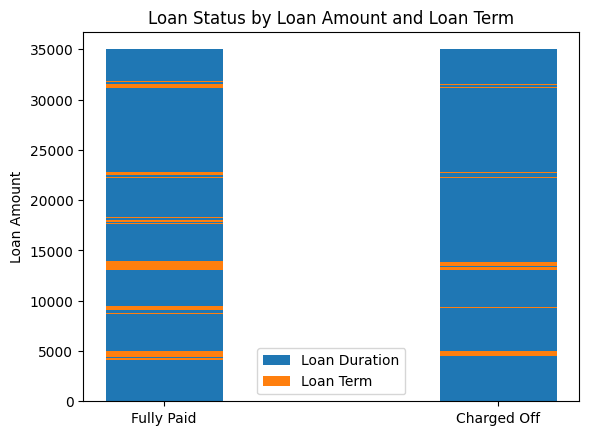

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
loan_status = final_loan_data['loan_status']
loan_amount = final_loan_data['loan_amnt']
loan_term = final_loan_data['term']

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the width of the bars
width = 0.35

# Create the bars
bars2 = ax.bar(loan_status, loan_amount , width, label='Loan Duration')
bars1 = ax.bar(loan_status, loan_term, width, bottom=loan_amount, label='Loan Term')

# Add labels, title, and legend
ax.set_ylabel('Loan Amount')
ax.set_title('Loan Status by Loan Amount and Loan Term')
ax.legend()

# Show the plot
#plt.show()
